# Problem Set #9

### MACS 30150, Dr. Evans
### Ruixi Li

## 1.Neural network horse race

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('data/strongdrink.txt', na_values='?')
df.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### (a)

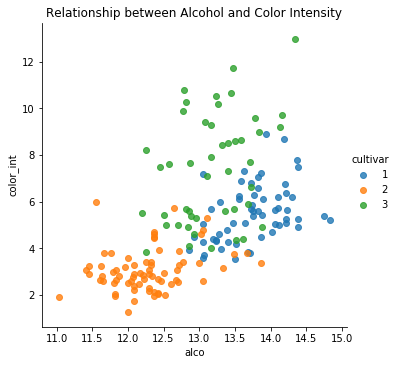

In [4]:
sns.lmplot( x='alco', y="color_int", data=df, hue='cultivar', legend='cultivar', fit_reg=False)
plt.title('Relationship between Alcohol and Color Intensity')
plt.show()

#### (b) Logistic Regression

In [5]:
# store MSEs.
d = {}

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_uniform

X = df[['alco', 'malic', 'tot_phen', 'color_int']].values
y = df.cultivar.values
logit = LogisticRegression()

param_dist1 = {'penalty': ['l1', 'l2'],
               'C': sp_uniform(0.1, 10.0)}
random_search1 = RandomizedSearchCV(logit, param_distributions=param_dist1,
                                    n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

rs_fit1 = random_search1.fit(X, y)
print('The optimal tuning parameter values are', rs_fit1.best_params_)
d['logit'] = abs(rs_fit1.best_score_)
print('MSE of my optimal results is', abs(rs_fit1.best_score_))

The optimal tuning parameter values are {'C': 2.665871587495725, 'penalty': 'l1'}
MSE of my optimal results is 0.11931818181818182


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### (c) Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

random_forest = RandomForestClassifier()

param_dist2 = {'n_estimators': [10, 200],
               'max_depth': [2, 4],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 4)}
random_search2 = RandomizedSearchCV(random_forest, param_distributions=param_dist2,
                                    n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

rs_fit2 = random_search2.fit(X, y)
print('The optimal tuning parameter values are', rs_fit2.best_params_)
d['random_forest'] = abs(rs_fit2.best_score_)
print('MSE of my optimal results is', abs(rs_fit2.best_score_))

The optimal tuning parameter values are {'max_depth': 2, 'max_features': 1, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 10}
MSE of my optimal results is 0.13636363636363635


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### (d) SVC

In [8]:
from sklearn.svm import SVC
from scipy.stats import uniform as sp_uniform
svc = SVC(kernel='rbf')

param_dist3 = {'C': sp_uniform(loc=0.1, scale=10.0),
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False]}
random_search3 = RandomizedSearchCV(svc, param_distributions=param_dist3,
                                    n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

rs_fit3 = random_search3.fit(X, y)
print('The optimal tuning parameter values are', rs_fit3.best_params_)
d['svc'] = abs(rs_fit3.best_score_)
print('MSE of my optimal results is', abs(rs_fit3.best_score_))

The optimal tuning parameter values are {'C': 3.3605112613782553, 'gamma': 'scale', 'shrinking': True}
MSE of my optimal results is 0.14772727272727273


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### (e) Neural Network

In [10]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()

param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
               'activation': ['logistic', 'relu'],
               'alpha': sp_uniform(0.1, 10.0)}
random_search4 = RandomizedSearchCV(mlp, param_distributions=param_dist4,
                                    n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

rs_fit4 = random_search4.fit(X, y)
print('The optimal tuning parameter values are', rs_fit4.best_params_)
d['mlp'] = abs(rs_fit4.best_score_)
print('MSE of my optimal results is', abs(rs_fit4.best_score_))

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The optimal tuning parameter values are {'activation': 'logistic', 'alpha': 0.16597664201326903, 'hidden_layer_sizes': 96}
MSE of my optimal results is 0.19318181818181818


#### (f) 

In [18]:
mse = pd.DataFrame(list(d.items()), columns=['Method', 'MSE'])
mse

,Method,MSE
0,logit,0.119318
1,random_forest,0.136364
2,svc,0.147727
3,mlp,0.193182


Among logistic regression, random forest, SVM and nueral network models, I think logistic regression is the best predictor of cultivar, becasue it induces the smallest mean squared error.

Among random forest, SVM and nueral network, I think random forest perform better than the other two, since the MSE scores are the smallest.